<a href="https://colab.research.google.com/github/alchatman3/IDS/blob/main/HW4Prob2_RandPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Start rmagic to mix Python and R code sells
%load_ext rpy2.ipython

In [2]:
# Import file from computer

from google.colab import files 
uploaded = files.upload()

Saving nutritionSubset.csv to nutritionSubset.csv


In [4]:
# Creating a dataframe with the file

import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['nutritionSubset.csv'].decode('utf-8')))
df

,food item,weightInGrams,saturatedFat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


In [5]:
# Creating a datafram with the file in R
%%R

library(readr)
df <- read_csv("nutritionSubset.csv", show_col_types = FALSE)

In [6]:
# Sorting the dataset by saturated fat, showing the first five food with the highest saturated fat
df.sort_values(by=['saturatedFat'], ascending=False).iloc[0:5]

# The saturated fat is greater for the food items bigger in weight

,food item,weightInGrams,saturatedFat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


In [6]:
# Sorting the dataset by saturated fat, showing the first five food with the highest saturated fat in R

%%R

head(df[order(df$saturatedFat, decreasing=TRUE), 1:4], 5)

# A tibble: 5 × 4
  `food item`                           weightInGrams saturatedFat cholesterol
  <chr>                                         <dbl>        <dbl>       <dbl>
1 CHEESECAKE                    1 CAKE           1110        120.         2053
2 ICE CREAM; VANLLA; RICH 16% FT1/2 GAL          1188        118.          703
3 YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE           1108         92           609
4 CREME PIE                     1 PIE             910         90.1          46
5 LARD                          1 CUP             205         80.4         195


In [8]:
# Add a new column saturatedFatPerGram that is the saturated fat divided by the weight in grams
df['saturatedFatPerGram'] = range(0, 961)

df['saturatedFatPerGram'] = df['saturatedFat'] / df['weightInGrams']

# Sorting the dataset by saturated fat per gram, showing the first five food with the highest saturated fat per gram
df.sort_values(by=['saturatedFatPerGram'], ascending=False).iloc[0:5]

# 1 tablespoon of salted and unsalted butter has the highest saturated fat per gram of .50714

,food item,weightInGrams,saturatedFat,cholesterol,saturatedFatPerGram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


In [10]:
# Add a new column saturatedFatPerGram that is the saturated fat divided by the weight in grams
%%R

df$saturatedFatPerGram <- df$saturatedFat / df$weightInGrams

# Sorting the dataset by saturated fat per gram, showing the first five food with the highest saturated fat per gram in R
head(df[order(df$saturatedFatPerGram, decreasing=TRUE), 1:5], 5)

# A tibble: 5 × 5
  `food item`            weightInGrams saturatedFat cholesterol saturatedFatPer…
  <chr>                          <dbl>        <dbl>       <dbl>            <dbl>
1 BUTTER; SALTED       …            14          7.1          31            0.507
2 BUTTER; UNSALTED     …            14          7.1          31            0.507
3 BUTTER; SALTED       …           113         57.1         247            0.505
4 BUTTER; UNSALTED     …           113         57.1         247            0.505
5 BUTTER; SALTED       …             5          2.5          11            0.5  


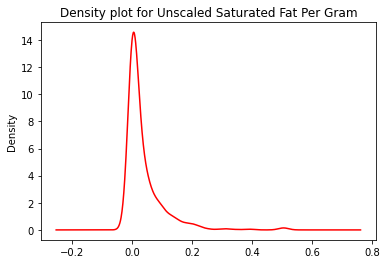

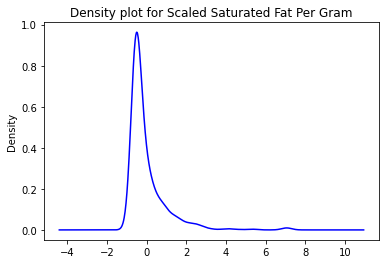

In [20]:
# Standardizing the saturated fat per gram and creating the scaled and unscaled density plots
from scipy import stats
import matplotlib.pyplot as plt


df['scaled_satfat'] = stats.zscore(df.saturatedFatPerGram, nan_policy='omit')

df.saturatedFatPerGram.plot.density(color="red")
plt.title('Density plot for Unscaled Saturated Fat Per Gram')
plt.show()


df.scaled_satfat.plot.density(color="blue")
plt.title('Density plot for Scaled Saturated Fat Per Gram')
plt.show()

# All values are fairly close to 0

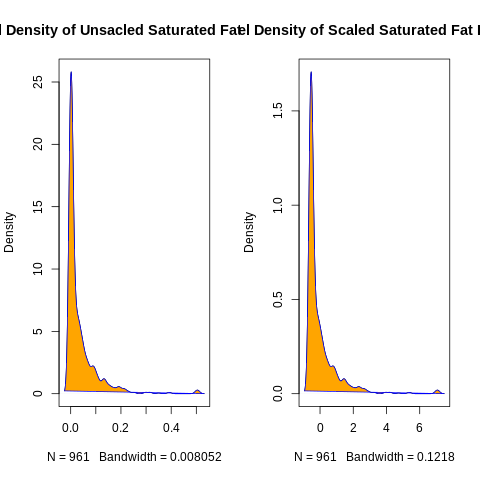

In [21]:
# Standardizing the saturated fat per gram and creating the scaled and unscaled density plots in R

%%R

df$scaled_satfat <- scale(x = df$saturatedFatPerGram)

par(mfrow=c(1, 2))

# Kernel Density Plot
d1 <- density(df$saturatedFatPerGram) 

# plots the results
plot(d1, main="Kernel Density of Unsacled Saturated Fat Per Gram") 

# plots the results (filled)
polygon(d1, col="orange", border="blue")


# Kernel Density Plot
d2 <- density(df$scaled_satfat) 

# plots the results
plot(d2, main="Kernel Density of Scaled Saturated Fat Per Gram") 

# plots the results (filled)
polygon(d2, col="orange", border="blue") 

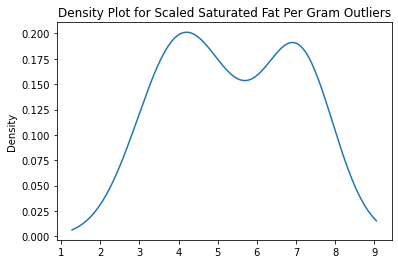

In [22]:
# Determine the outliers using the three sigma rule for the scaled_satfat attribute

satfat_outliers = df.query('(scaled_satfat > 3 | scaled_satfat < -3)')['scaled_satfat']

satfat_outliers.plot.density()
plt.title('Density Plot for Scaled Saturated Fat Per Gram Outliers')
plt.show()

In [23]:
%%R
# Determine the three sigma rule first for the scaled_satfat attribute

three_sigma_rule <- (df$scaled_satfat < -3 | 
                     df$scaled_satfat > 3 )


# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")


# The condition given as input to which() states that we want
# all records whose scaled saturated fat per gram values are less than −3 or greater than 3. 

# The which() command returns the row indices of all such records. 


cat("The scaled saturated fat per gram values that are outliers: \n\n")
df$scaled_satfat[which(three_sigma_rule)]


cat("\n\nThe scaled saturated fat per gram values that are NOT outliers: \n\n")
df$scaled_satfat[which(!three_sigma_rule)]

# There are 15 outliers for the scaled saturated fat per gram

There are 15 outliers 

The scaled age values that are outliers: 



The scaled age values that are NOT outliers: 

  [1] -0.562042578 -0.135330425 -0.562042578  2.318264454  2.326185298
  [6]  2.462279806 -0.562042578  0.351554809 -0.508672183 -0.495329584
 [11] -0.495573954 -0.020184817 -0.184002280  0.069905383 -0.038602165
 [16] -0.015984370  1.094133966 -0.191717388  2.064342650 -0.403793151
 [21]  0.761098465  0.389155591 -0.015984370  0.052272906  0.291883742
 [26] -0.312980734 -0.401931393 -0.178961743 -0.313616096  0.273031513
 [31] -0.348560998 -0.188449813 -0.312980734  0.451398785  0.451398785
 [36]  1.091467015  2.104908378  0.162090951  0.330380421  0.005017869
 [41]  0.654638841  0.817804510 -0.064893693 -0.321471479 -0.281212642
 [46] -0.117289286  0.576525849  0.309673874  0.843377824  0.167352821
 [51]  0.505365322  0.470398512  0.470398512 -0.006554793  0.286890021
 [56]  0.185142952  1.359291642  0.434204796 -0.259610339  0.572078316
 [61]  1.252550852 -0.032786161 

In [24]:
# Are there any columns with missing values?

df.isnull().values.any()

# There are no missing values

False

In [26]:
# Checking for missing values in R
%%R

sum(is.na(df))

[1] 0


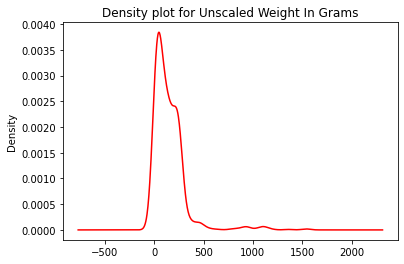

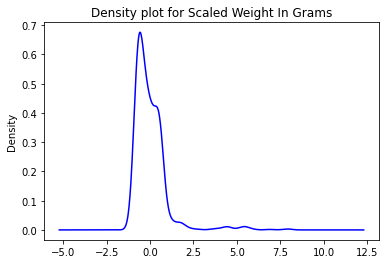

In [27]:
# Creating the scaled and unscaled density plots for weight in grams
from scipy import stats
import matplotlib.pyplot as plt


df['scaled_weight'] = stats.zscore(df.weightInGrams, nan_policy='omit')

df.weightInGrams.plot.density(color="red")
plt.title('Density plot for Unscaled Weight In Grams')
plt.show()


df.scaled_weight.plot.density(color="blue")
plt.title('Density plot for Scaled Weight In Grams')
plt.show()

# Most weights are around 100 grams

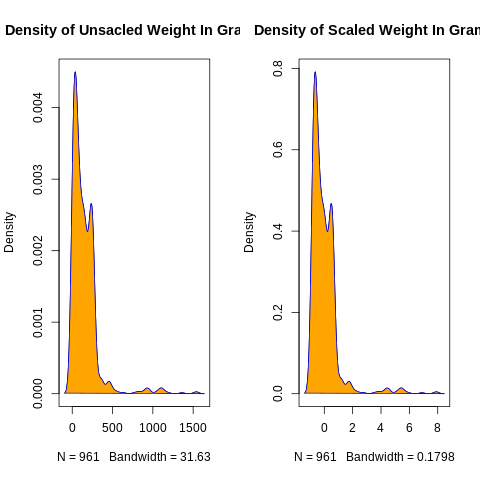

In [29]:
# Creating the scaled and unscaled density plots for weight in grams in R

%%R

df$scaled_weight <- scale(x = df$weightInGrams)

par(mfrow=c(1, 2))

# Kernel Density Plot
d1 <- density(df$weightInGrams) 

# plots the results
plot(d1, main="Density of Unsacled Weight In Grams") 

# plots the results (filled)
polygon(d1, col="orange", border="blue")


# Kernel Density Plot
d2 <- density(df$scaled_weight) 

# plots the results
plot(d2, main="Density of Scaled Weight In Grams") 

# plots the results (filled)
polygon(d2, col="orange", border="blue") 

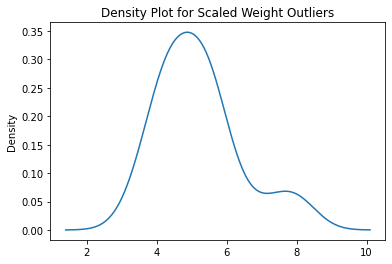

In [19]:
# Determine the outliers using the three sigma rule for the scaled_weight attribute

weight_outliers = df.query('(scaled_weight > 3 | scaled_weight < -3)')['scaled_weight']

weight_outliers.plot.density()
plt.title('Density Plot for Scaled Weight Outliers')
plt.show()

In [30]:
%%R
# Determine the three sigma rule first for the scaled_weight attribute

three_sigma_rule <- (df$scaled_weight < -3 | 
                     df$scaled_weight > 3 )


# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")


# The condition given as input to which() states that we want
# all records whose scaled weight values are less than −3 or greater than 3. 

# The which() command returns the row indices of all such records. 


cat("The scaled weight values that are outliers: \n\n")
df$scaled_weight[which(three_sigma_rule)]


cat("\n\nThe scaled weight values that are NOT outliers: \n\n")
df$scaled_weight[which(!three_sigma_rule)]

There are 22 outliers 

The scaled age values that are outliers: 



The scaled age values that are NOT outliers: 

  [1] -0.809561060 -0.688191734 -0.809561060 -0.688191734 -0.280879688
  [6] -0.820930552 -0.803876314 -0.576486477 -0.366150877 -0.462791558
 [11] -0.332042402 -0.167184770 -0.440052574 -0.468476304 -0.405944099
 [16] -0.440052574 -0.491215288 -0.292249180 -0.741344109 -0.360466131
 [21] -0.758398347 -0.496900034 -0.440052574 -0.485530542 -0.366150877
 [26] -0.366150877 -0.366150877 -0.422998337 -0.053489851 -0.468476304
 [31] -0.366150877 -0.366150877 -0.366150877 -0.688191734 -0.688191734
 [36] -0.688191734 -0.688191734 -0.445737320 -0.502584780 -0.440052574
 [41] -0.354781385 -0.394574607 -0.434367828 -0.599225461 -0.053489851
 [46] -0.366150877 -0.366150877 -0.366150877 -0.366150877 -0.366150877
 [51] -0.366150877 -0.025066121 -0.025066121 -0.570801731 -0.525323763
 [56] -0.366150877 -0.366150877 -0.366150877 -0.735659363 -0.803876314
 [61] -0.735659363 -0.053489851 

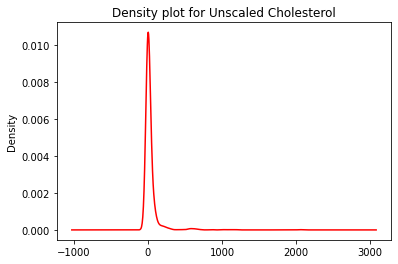

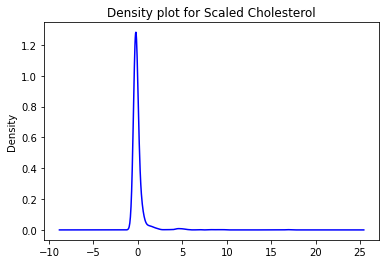

In [31]:
# Creating the scaled and unscaled density plots for cholesterol

from scipy import stats
import matplotlib.pyplot as plt


df['scaled_cholesterol'] = stats.zscore(df.cholesterol, nan_policy='omit')

df.cholesterol.plot.density(color="red")
plt.title('Density plot for Unscaled Cholesterol')
plt.show()


df.scaled_cholesterol.plot.density(color="blue")
plt.title('Density plot for Scaled Cholesterol')
plt.show()

# The cholesterol values are all around 0

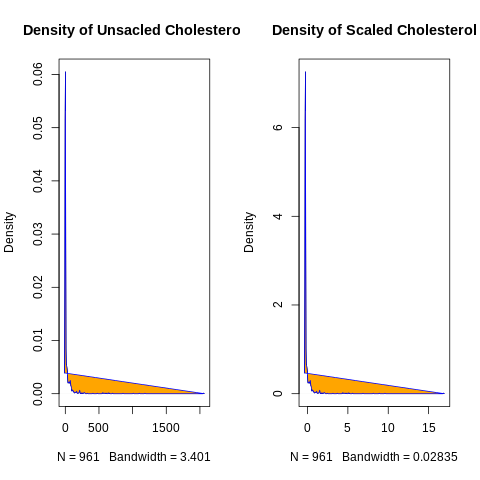

In [32]:
# Creating the scaled and unscaled density plots for cholesterol in R
%%R

df$scaled_cholesterol <- scale(x = df$cholesterol)

par(mfrow=c(1, 2))

# Kernel Density Plot
d1 <- density(df$cholesterol) 

# plots the results
plot(d1, main="Density of Unsacled Cholesterol") 

# plots the results (filled)
polygon(d1, col="orange", border="blue")


# Kernel Density Plot
d2 <- density(df$scaled_cholesterol) 

# plots the results
plot(d2, main="Density of Scaled Cholesterol") 

# plots the results (filled)
polygon(d2, col="orange", border="blue") 

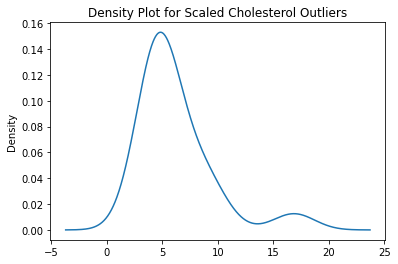

In [20]:
# Determine the outliers using the three sigma rule for the scaled_cholesterol attribute

cholesterol_outliers = df.query('(scaled_cholesterol > 3 | scaled_cholesterol < -3)')['scaled_cholesterol']

cholesterol_outliers.plot.density()
plt.title('Density Plot for Scaled Cholesterol Outliers')
plt.show()

In [33]:
%%R
# Determine the three sigma rule first for the scaled_cholesterol attribute

three_sigma_rule <- (df$scaled_cholesterol < -3 | 
                     df$scaled_cholesterol > 3 )


# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")


# The condition given as input to which() states that we want
# all records whose scaled cholesterol values are less than −3 or greater than 3. 

# The which() command returns the row indices of all such records. 


cat("The scaled cholesterol values that are outliers: \n\n")
df$scaled_cholesterol[which(three_sigma_rule)]


cat("\n\nThe scaled cholesterol values that are NOT outliers: \n\n")
df$scaled_cholesterol[which(!three_sigma_rule)]

There are 17 outliers 

The scaled age values that are outliers: 



The scaled age values that are NOT outliers: 

  [1] -0.271369038 -0.271369038 -0.271369038 -0.087975476  0.387180572
  [6] -0.238024754 -0.271369038  0.220459152  0.128762371 -0.171336186
 [11] -0.129655831  0.420524856  0.112090229  0.362172359  0.353836288
 [16]  0.320492004  0.370508430  0.453869140 -0.137991902  0.337164146
 [21] -0.271369038  0.278811649  0.262139507  0.228795223  0.403852714
 [26]  0.270475578  0.220459152  0.162106655  0.612254490  0.328828075
 [31]  1.095746609  0.328828075  0.187114868 -0.271369038 -0.271369038
 [36] -0.146327973 -0.054631192  0.195450939  0.137098442  0.295483791
 [41]  0.428860927  0.378844501  0.270475578  0.070409874  0.695615200
 [46]  0.370508430  0.245467365  0.503885567  0.445533069  0.637262703
 [51] -0.271369038 -0.271369038  0.095418087  0.145434513  0.395516643
 [56]  0.453869140  0.378844501  0.778975910 -0.271369038 -0.137991902
 [61]  0.720623413  0.037065589 